# 12: Clustering

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## K-Means clustering

### KMeans

In [80]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [81]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [82]:
  from imblearn.under_sampling import RandomUnderSampler
  rus=RandomUnderSampler(sampling_strategy=0.5)
  X,y=rus.fit_resample(X,y)
  print(X.shape)
  print(y.shape)

(2319, 9)
(2319,)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
X_train.shape

(1855, 9)

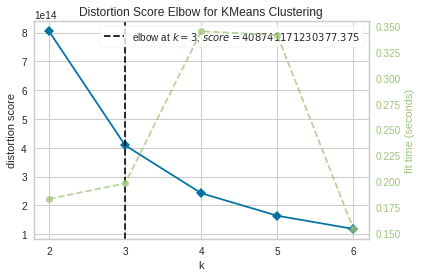

In [85]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X_train)
ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

In [86]:
km = KMeans(n_clusters=3)
model=km.fit(X_train)
y_kmeans=model.fit_predict(X_train)

In [87]:
y_kmeans

array([1, 0, 1, ..., 2, 2, 2], dtype=int32)

Para conocer los centros de los *clusters* y los datos asignados a cada uno, se utiliza:

In [88]:
centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[ 3.21254355e+00  9.93960468e+02 -8.76182428e-04  6.70768010e-03
   3.05769013e+06  4.66902592e-01  2.98022983e+02  2.98322720e+02
   2.99143866e+02]
 [ 2.38669673e+00  8.74644614e+02 -1.26244059e-03  4.24675485e-04
   6.09989806e+06  3.16586117e-01  3.01310410e+02  3.02135582e+02
   3.02693759e+02]
 [ 2.78560940e+00  9.75221383e+02 -1.15376879e-03  2.81409879e-03
   4.71834519e+06  4.13116899e-01  2.99469261e+02  3.00113312e+02
   3.00751081e+02]]
número de datos asignados a cada centroide:
[287 887 681]


Para graficar los datos de acuerdo con el *cluster* asignado a cada dato se utiliza:

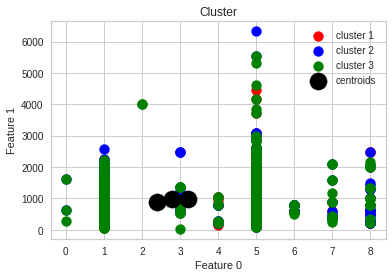

In [89]:
X=np.array(X_train)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='black', label='centroids')
plt.title('Cluster')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend();

## Hierarchical clustering

### Matriz de Distancias

In [90]:
from scipy.spatial import distance_matrix
dd1=pd.DataFrame(distance_matrix(X,X,p=1))  ##distancia de Manhattan
dd1.head()

,0,1,2,3,4,5,6,7,8,9,...,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854
0,0.000000e+00,4.999555e+06,6.656581e+04,1.873476e+05,2.190848e+06,9.469540e+05,7.124947e+05,8.329564e+05,5.982147e+05,4.035346e+06,...,3.017012e+06,9.948961e+03,3.524908e+06,2.551591e+06,7.924493e+05,4.768951e+05,1.554189e+05,9.596169e+05,8.351170e+05,7.654199e+05
1,4.999555e+06,0.000000e+00,4.933006e+06,4.812328e+06,2.810315e+06,4.055403e+06,5.711458e+06,4.166606e+06,5.597620e+06,9.667013e+05,...,1.986068e+06,5.008955e+06,1.474927e+06,2.448754e+06,5.791413e+06,4.523143e+06,5.154382e+06,4.041572e+06,4.165653e+06,4.236407e+06
2,6.656581e+04,4.933006e+06,0.000000e+00,1.207880e+05,2.124299e+06,8.804038e+05,7.787081e+05,7.663997e+05,6.646284e+05,3.968796e+06,...,2.950463e+06,7.615819e+04,3.458359e+06,2.485041e+06,8.586584e+05,4.103455e+05,2.216281e+05,8.930663e+05,7.685662e+05,6.988569e+05
3,1.873476e+05,4.812328e+06,1.207880e+05,0.000000e+00,2.003511e+06,7.596159e+05,8.991304e+05,6.457363e+05,7.854102e+05,3.848009e+06,...,2.829675e+06,1.967371e+05,3.337571e+06,2.364253e+06,9.791857e+05,2.895576e+05,3.420543e+05,7.722785e+05,6.477784e+05,5.780728e+05
4,2.190848e+06,2.810315e+06,2.124299e+06,2.003511e+06,0.000000e+00,1.245088e+06,2.902082e+06,1.357899e+06,2.788913e+06,1.844498e+06,...,8.261669e+05,2.200240e+06,1.335389e+06,3.615682e+05,2.982697e+06,1.713953e+06,2.344462e+06,1.231265e+06,1.355733e+06,1.426100e+06


In [91]:
dd2=pd.DataFrame(distance_matrix(X,X,p=2)) #distancia Euclidiana
dd2.head()

,0,1,2,3,4,5,6,7,8,9,...,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854
0,0.000000e+00,4.999250e+06,6.638772e+04,1.869918e+05,2.189742e+06,9.452575e+05,7.118583e+05,8.326641e+05,5.981385e+05,4.033795e+06,...,3.014949e+06,9.665906e+03,3.524464e+06,2.550897e+06,7.921321e+05,4.763568e+05,1.545066e+05,9.585036e+05,8.342135e+05,7.639893e+05
1,4.999250e+06,0.000000e+00,4.932863e+06,4.812259e+06,2.809509e+06,4.053994e+06,5.711108e+06,4.166586e+06,5.597389e+06,9.654557e+05,...,1.984302e+06,5.008912e+06,1.474786e+06,2.448354e+06,5.791382e+06,4.522894e+06,5.153754e+06,4.040747e+06,4.165037e+06,4.235262e+06
2,6.638772e+04,4.932863e+06,0.000000e+00,1.206041e+05,2.123354e+06,8.788698e+05,7.782456e+05,7.662765e+05,6.645260e+05,3.967408e+06,...,2.948562e+06,7.604957e+04,3.458077e+06,2.484509e+06,8.585195e+05,4.099692e+05,2.208927e+05,8.921160e+05,7.678258e+05,6.976016e+05
3,1.869918e+05,4.812259e+06,1.206041e+05,0.000000e+00,2.002750e+06,7.582657e+05,8.988495e+05,6.456725e+05,7.851300e+05,3.846804e+06,...,2.827958e+06,1.966535e+05,3.337473e+06,2.363905e+06,9.791235e+05,2.893651e+05,3.414959e+05,7.715119e+05,6.472217e+05,5.769975e+05
4,2.189742e+06,2.809509e+06,2.123354e+06,2.002750e+06,0.000000e+00,1.244485e+06,2.901599e+06,1.357078e+06,2.787880e+06,1.844054e+06,...,8.252078e+05,2.199403e+06,1.334723e+06,3.611554e+05,2.981873e+06,1.713385e+06,2.344245e+06,1.231238e+06,1.355528e+06,1.425753e+06


In [92]:
dd8=pd.DataFrame(distance_matrix(X,X,p=8)) #distancia de Minkowski
dd8.head()

,0,1,2,3,4,5,6,7,8,9,...,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854
0,0.0,4999250.0,66387.5,186991.5,2189741.3,945256.0,711858.0,832664.0,598138.5,4033795.1,...,3014948.5,9662.0,3524464.3,2550896.5,792132.0,476356.5,154504.0,958503.0,834213.0,763988.0
1,4999250.0,0.0,4932862.5,4812258.5,2809508.7,4053994.0,5711108.0,4166586.0,5597388.5,965454.9,...,1984301.5,5008912.0,1474785.7,2448353.5,5791382.0,4522893.5,5153754.0,4040747.0,4165037.0,4235262.0
2,66387.5,4932862.5,0.0,120604.0,2123353.8,878868.5,778245.5,766276.5,664526.0,3967407.6,...,2948561.0,76049.5,3458076.8,2484509.0,858519.5,409969.0,220891.5,892115.5,767825.5,697600.5
3,186991.5,4812258.5,120604.0,0.0,2002749.8,758264.5,898849.5,645672.5,785130.0,3846803.6,...,2827957.0,196653.5,3337472.8,2363905.0,979123.5,289365.0,341495.5,771511.5,647221.5,576996.5
4,2189741.3,2809508.7,2123353.8,2002749.8,0.0,1244485.3,2901599.3,1357077.3,2787879.8,1844053.8,...,825207.2,2199403.3,1334723.0,361155.2,2981873.3,1713384.8,2344245.3,1231238.3,1355528.3,1425753.3


In [93]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z=linkage(X,method='ward',metric='euclidean') # matriz Z con todos los enlaces creados
Z[:17]

array([[ 147.        ,  663.        ,   39.79182336,    2.        ],
       [1378.        , 1620.        ,   49.70067674,    2.        ],
       [1041.        , 1385.        ,   57.8439118 ,    2.        ],
       [1240.        , 1353.        ,   58.98388627,    2.        ],
       [  73.        ,  779.        ,   66.85961847,    2.        ],
       [ 128.        , 1696.        ,   71.85950911,    2.        ],
       [ 537.        ,  780.        ,   73.43732631,    2.        ],
       [1102.        , 1821.        ,   87.27210131,    2.        ],
       [ 362.        ,  460.        ,  104.50906823,    2.        ],
       [1033.        , 1048.        ,  106.16141774,    2.        ],
       [ 350.        , 1125.        ,  111.61173384,    2.        ],
       [ 835.        , 1268.        ,  115.30314121,    2.        ],
       [ 109.        ,  724.        ,  125.49796847,    2.        ],
       [ 368.        , 1006.        ,  127.48002054,    2.        ],
       [ 715.        , 1251.      

In [94]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
C, coph_dist=cophenet(Z,pdist(X)) #Coeficiente de Cophenet
C

0.7315710708001801

In [95]:
Z[106-len(X)] # para saber los puntos que se encuentran en el cluster 106, que se agrego  en el item 17 de Z

array([1275.        , 1930.        ,  388.27296467,    3.        ])

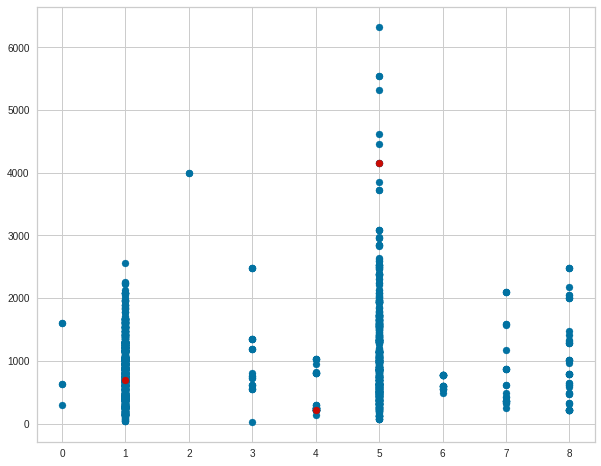

In [96]:
idx=[26,55,40] # los tres puntos que agrego
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1]) #pintar todos los puntos
plt.scatter(X[idx,0],X[idx,1],c='r') #para destacar los tres puntos agregados
plt.show()

### Dendrograma

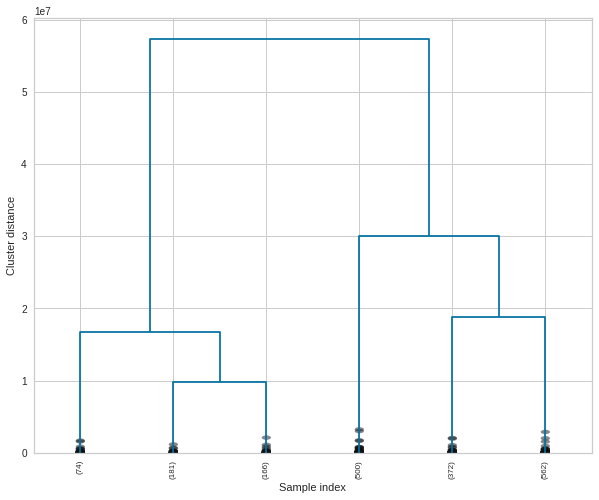

In [97]:
plt.figure(figsize=(10,8))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=6,show_leaf_counts=True,show_contracted=True)
plt.show()

In [98]:
Z[-6:,]

array([[3.69700000e+03, 3.69800000e+03, 7.39728230e+06, 5.00000000e+02],
       [3.69500000e+03, 3.69900000e+03, 9.85336196e+06, 3.47000000e+02],
       [3.70000000e+03, 3.70400000e+03, 1.66806107e+07, 4.21000000e+02],
       [3.70100000e+03, 3.70200000e+03, 1.88361456e+07, 9.34000000e+02],
       [3.70300000e+03, 3.70600000e+03, 2.99837002e+07, 1.43400000e+03],
       [3.70500000e+03, 3.70700000e+03, 5.73647673e+07, 1.85500000e+03]])

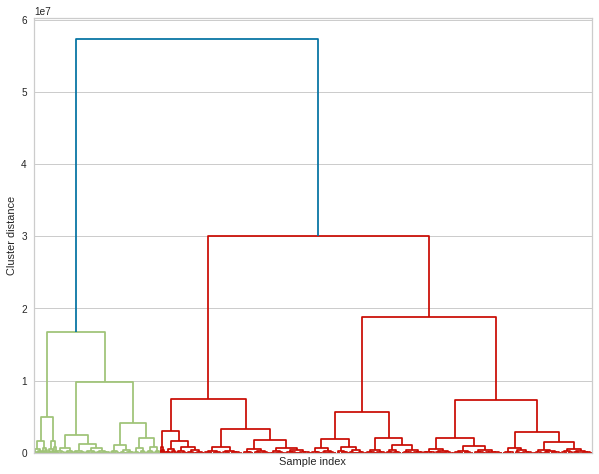

In [99]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'), no_labels=True, truncate_mode='level')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

In [100]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
print(hc.labels_)

[2 1 0 ... 0 0 0]


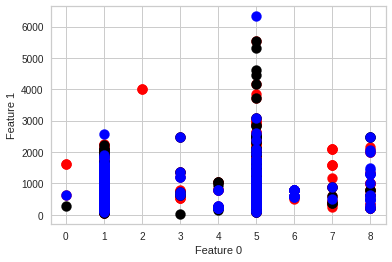

In [101]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='black')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

Otra forma de visualizar los datos de manera mas sencilla es:

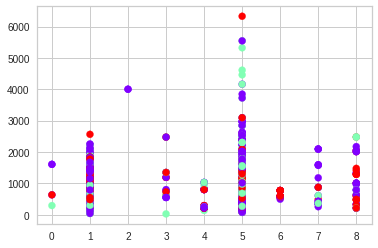

In [102]:
plt.scatter(X[:,0],X[:,1], c=hc.labels_, cmap='rainbow');

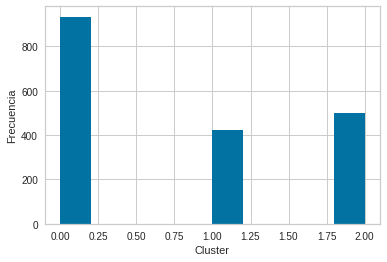

In [103]:
prueba=pd.Series(hc.labels_)
plt.hist(prueba)
plt.xlabel('Cluster')
plt.ylabel('Frecuencia');

## *Elbow curve*

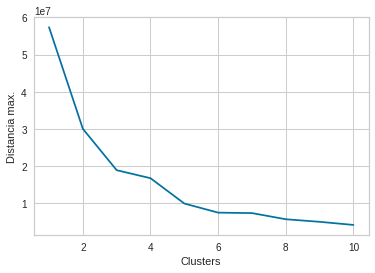

In [104]:
last=Z[-10:,2]
last_rev=last[::-1] #e voltean
idx=np.arange(1,len(last)+1)
plt.plot(idx,last_rev)
plt.xlabel('Clusters')
plt.ylabel('Distancia max.');

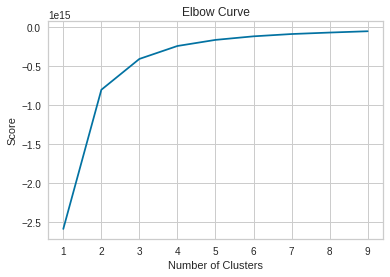

In [105]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve');

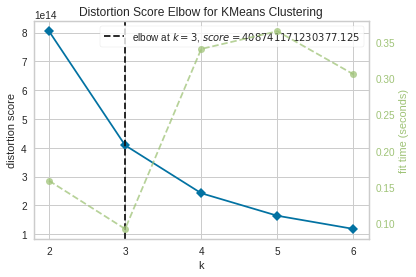

In [106]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X)

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

In [107]:
!pip install data-science-utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


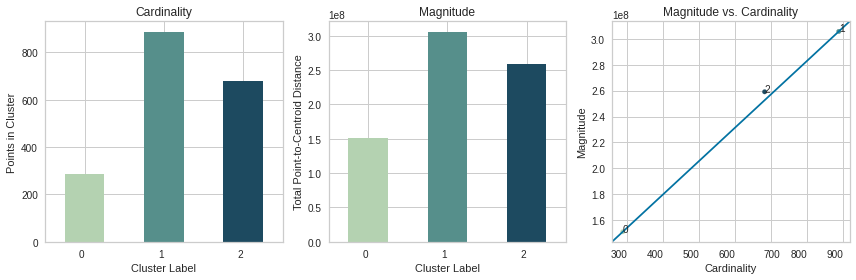

In [108]:
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean

# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))

plot_cluster_cardinality(model.labels_,
                         ax=ax1,
                         title="Cardinality",
                         color=cluster_colors
                        )
plot_cluster_magnitude(X,
                       model.labels_,
                       model.cluster_centers_,
                       euclidean,
                       ax=ax2,
                       title="Magnitude",
                       color=cluster_colors
                      )
plot_magnitude_vs_cardinality(X,
                              model.labels_,
                              model.cluster_centers_,
                              euclidean,
                              color=cluster_colors[0:model.n_clusters],
                              ax=ax3, 
                              title="Magnitude vs. Cardinality")

fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()